# Sedia Payung Sebelum Hujan, Tapi Kapan?
An analysis of climate change that happens in Indonesia. For interactive dashboard, you can visit here

by Nafis Azizi Riza, Computer Science, Universitas Indonesia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Loading

### Load Indonesia Files

In [2]:
df_ina = pd.read_csv('dataset/ina/df_ina.csv', encoding='unicode_escape')
df_ina

,year,month,mean_temp,max_temp,min_temp,precipitation
0,1901,Jan,25.28,29.74,20.87,281.37
1,1901,Feb,25.21,29.77,20.70,252.74
2,1901,Mar,25.65,30.21,21.14,278.82
3,1901,Apr,25.74,30.37,21.16,257.90
4,1901,May,25.86,30.47,21.29,219.86
...,...,...,...,...,...,...
1447,2021,Aug,25.57,30.22,20.97,230.50
1448,2021,Sep,25.95,30.62,21.33,241.36
1449,2021,Oct,26.60,31.35,21.89,235.04
1450,2021,Nov,26.14,30.77,21.56,305.74


In [3]:
rename = {"Jan":'01_Jan', 'Feb':'02_Feb', 'Mar':'03_Mar', 'Apr':'04_Apr',\
         'May':'05_May', 'Jun':'06_Jun', 'Jul':'07_Jul', 'Aug':'08_Aug',\
         'Sep':'09_Sep', 'Oct':'10_Oct', 'Nov':'11_Nov', 'Dec':'12_Dec'}

for lab, row in df_ina.iterrows():
    df_ina.loc[lab, 'month'] = rename[row['month']]
    
df_ina

,year,month,mean_temp,max_temp,min_temp,precipitation
0,1901,01_Jan,25.28,29.74,20.87,281.37
1,1901,02_Feb,25.21,29.77,20.70,252.74
2,1901,03_Mar,25.65,30.21,21.14,278.82
3,1901,04_Apr,25.74,30.37,21.16,257.90
4,1901,05_May,25.86,30.47,21.29,219.86
...,...,...,...,...,...,...
1447,2021,08_Aug,25.57,30.22,20.97,230.50
1448,2021,09_Sep,25.95,30.62,21.33,241.36
1449,2021,10_Oct,26.60,31.35,21.89,235.04
1450,2021,11_Nov,26.14,30.77,21.56,305.74


### Load By Region Files

In [4]:
# read the csv files and merge them altogether
mean_temp = pd.read_csv('dataset/mean_temp/mean_temp.csv', encoding='unicode_escape')
max_temp = pd.read_csv('dataset/max_temp/max_temp.csv', encoding='unicode_escape')
min_temp = pd.read_csv('dataset/min_temp/min_temp.csv', encoding='unicode_escape')
precipitation = pd.read_csv('dataset/precipitation/precipitation.csv', encoding='unicode_escape')

In [5]:
df_region = mean_temp.copy()
df_region['max_temp'] = max_temp['max_temp']
df_region['min_temp'] = min_temp['min_temp']
df_region['precipitation'] = precipitation['precipitation']
df_region

,province_name,year,month,mean_temp,max_temp,min_temp,precipitation
0,Aceh,1901,Jan,24.75,30.68,18.85,79.32
1,Aceh,1901,Feb,25.00,30.96,19.07,139.04
2,Aceh,1901,Mar,24.80,30.89,18.78,86.29
3,Aceh,1901,Apr,25.35,31.34,19.39,161.20
4,Aceh,1901,May,25.50,31.63,19.43,265.28
...,...,...,...,...,...,...,...
47911,Yogyakarta,2021,Aug,26.57,31.46,21.70,27.56
47912,Yogyakarta,2021,Sep,27.05,31.15,22.98,116.16
47913,Yogyakarta,2021,Oct,27.75,31.97,23.60,137.47
47914,Yogyakarta,2021,Nov,26.07,29.98,22.22,390.18


In [6]:
for lab, row in df_region.iterrows():
    df_region.loc[lab, 'month'] = rename[row['month']]

df_region

,province_name,year,month,mean_temp,max_temp,min_temp,precipitation
0,Aceh,1901,01_Jan,24.75,30.68,18.85,79.32
1,Aceh,1901,02_Feb,25.00,30.96,19.07,139.04
2,Aceh,1901,03_Mar,24.80,30.89,18.78,86.29
3,Aceh,1901,04_Apr,25.35,31.34,19.39,161.20
4,Aceh,1901,05_May,25.50,31.63,19.43,265.28
...,...,...,...,...,...,...,...
47911,Yogyakarta,2021,08_Aug,26.57,31.46,21.70,27.56
47912,Yogyakarta,2021,09_Sep,27.05,31.15,22.98,116.16
47913,Yogyakarta,2021,10_Oct,27.75,31.97,23.60,137.47
47914,Yogyakarta,2021,11_Nov,26.07,29.98,22.22,390.18


## Data Overview

In [7]:
# Indonesia data
display(df_ina.describe())
df_ina.info(())

,year,mean_temp,max_temp,min_temp,precipitation
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,1961.000000,25.621928,30.283616,21.010207,230.233802
std,34.940532,0.377526,0.383011,0.447277,54.159742
min,1901.000000,24.720000,29.010000,19.910000,90.310000
25%,1931.000000,25.370000,30.000000,20.710000,184.185000
50%,1961.000000,25.640000,30.300000,21.040000,238.470000
75%,1991.000000,25.870000,30.550000,21.300000,273.870000
max,2021.000000,26.760000,31.350000,22.380000,353.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1452 non-null   int64  
 1   month          1452 non-null   object 
 2   mean_temp      1452 non-null   float64
 3   max_temp       1452 non-null   float64
 4   min_temp       1452 non-null   float64
 5   precipitation  1452 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 68.2+ KB


In [8]:
# By region data
display(df_region.describe())
df_region.info(())

,year,mean_temp,max_temp,min_temp,precipitation
count,47916.000000,47916.000000,47916.000000,47916.000000,47916.000000
mean,1961.000000,25.728960,30.456686,21.051483,211.540526
std,34.928863,1.121942,1.229489,1.384856,103.351658
min,1901.000000,22.280000,26.640000,16.030000,0.000000
25%,1931.000000,24.900000,29.640000,20.000000,140.327500
50%,1961.000000,25.800000,30.510000,21.120000,209.575000
75%,1991.000000,26.500000,31.340000,22.080000,281.920000
max,2021.000000,29.600000,34.900000,25.320000,762.480000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47916 entries, 0 to 47915
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province_name  47916 non-null  object 
 1   year           47916 non-null  int64  
 2   month          47916 non-null  object 
 3   mean_temp      47916 non-null  float64
 4   max_temp       47916 non-null  float64
 5   min_temp       47916 non-null  float64
 6   precipitation  47916 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.6+ MB


## Exploratory Data Analysis

### Monthly Climatology 1901 - 2021 in Indonesia

In [9]:
# prepare the data to be visualized
df_ina_group = df_ina.groupby('month').mean().drop('year', axis=1)
df_ina_group

,mean_temp,max_temp,min_temp,precipitation
month,,,,
01_Jan,25.494711,29.940909,21.100744,284.326281
02_Feb,25.554298,30.094628,21.062810,255.908264
03_Mar,25.737769,30.280661,21.244959,285.121570
04_Apr,25.940413,30.535868,21.393554,267.769256
05_May,25.932066,30.521405,21.392066,233.411818
06_Jun,25.499835,30.122975,20.927355,184.142066
07_Jul,25.144711,29.837107,20.502479,167.264545
08_Aug,25.228099,30.056198,20.451157,167.410000
09_Sep,25.494793,30.379008,20.659917,170.790909


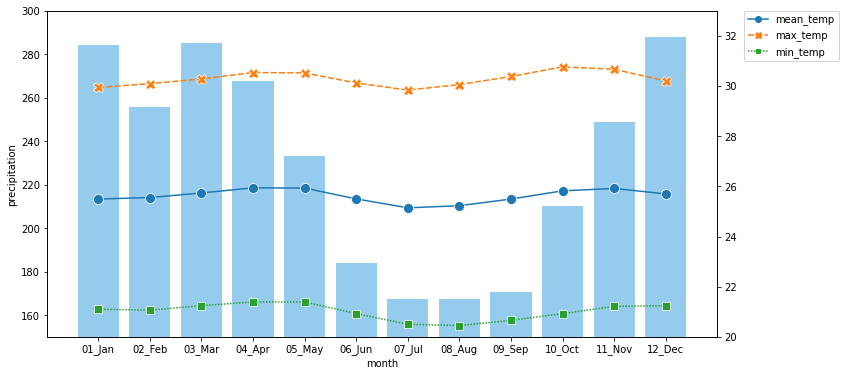

In [10]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=df_ina_group, x=df_ina_group.index, y='precipitation', color='lightskyblue')
plt.ylim(150,300) 

ax2 = ax1.twinx()
sns.lineplot(data=df_ina_group.loc[:,['mean_temp', 'max_temp', 'min_temp']],\
                   markers=True, ax=ax2, markersize=10)
plt.ylim(20,33)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0)
plt.show()

### Highlight (Top/Lowest) Climatology by Region

In [11]:
# group the dataframe based on the province_name
df_region_group = df_region.groupby('province_name').mean().drop('year', axis=1)

df_region_group

,mean_temp,max_temp,min_temp,precipitation
province_name,,,,
Aceh,25.101866,31.159380,19.094401,206.775496
Bali,25.191577,29.696191,20.732941,181.797410
Bangka Belitung,27.045806,31.209848,22.933395,214.241536
Banten,26.476185,31.297404,21.708278,260.182424
Bengkulu,25.732824,31.087851,20.426956,225.281977
Gorontalo,24.183299,28.164614,20.253099,171.922080
Jakarta,27.487466,32.105579,22.918320,199.361226
Jawa Barat,25.328244,30.547314,20.160875,241.196694
Jawa Tengah,25.908988,30.884215,20.983953,232.289738


#### Mean Temperature

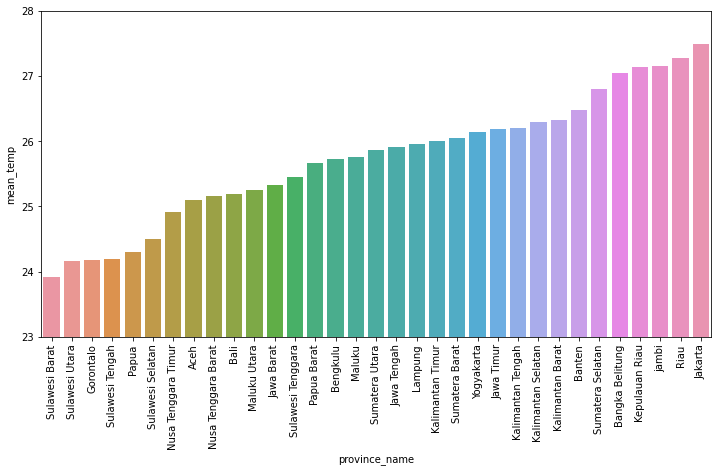

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_region_group, x=df_region_group.index, y='mean_temp',\
           order=df_region_group.sort_values('mean_temp').index)
plt.ylim(23,28)
plt.xticks(rotation=90)
plt.show()

#### Precipitation

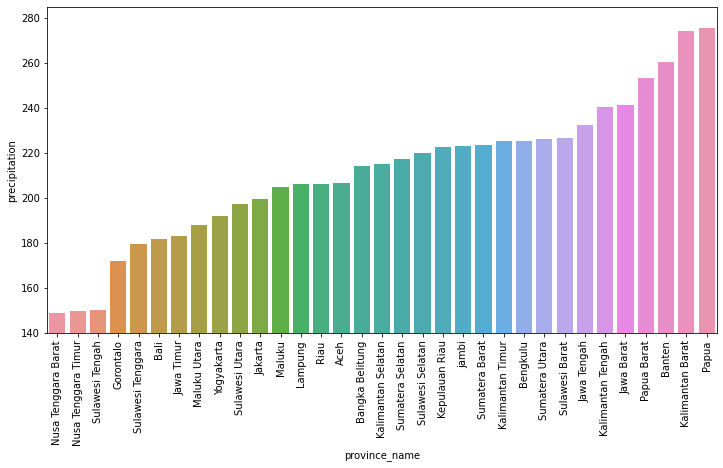

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_region_group, x=df_region_group.index, y='precipitation',\
           order=df_region_group.sort_values('precipitation').index)
plt.ylim(140,285)
plt.xticks(rotation=90)
plt.show()

### Comparison Precipitation Between 1901 and 2021

In [14]:
df_first = df_ina[(df_ina['year'] >= 1901) & (df_ina['year'] <= 1910)]
df_first = df_first.groupby('month').mean()

df_last = df_ina[(df_ina['year'] >= 2012) & (df_ina['year'] <= 2021)]
df_last = df_last.groupby('month').mean()

df_merge = pd.concat([df_first, df_last])
df_merge['year'] = df_merge['year'].replace({1905.5:'1901-1910', 2016.5:'2012-2021'})

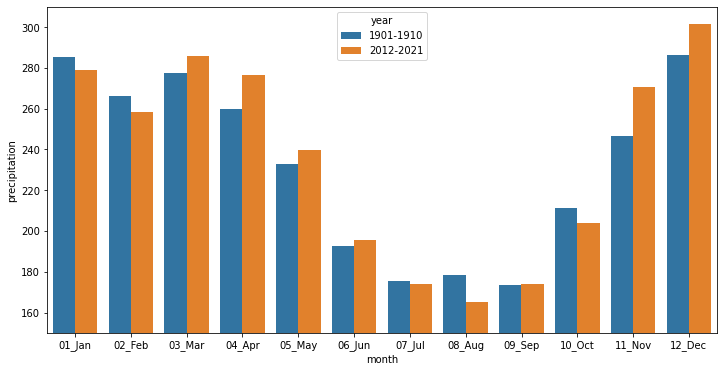

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merge, x=df_merge.index,hue='year',\
                  y='precipitation')
plt.ylim(150,310)
plt.show()

In [16]:
prp_gap = df_merge.groupby('year').mean()
prp_gap['prp_max'] = df_merge.groupby('year').max()['precipitation']
prp_gap['prp_min'] = df_merge.groupby('year').min()['precipitation']
prp_gap['prp_gap'] = prp_gap['prp_max'] - prp_gap['prp_min']

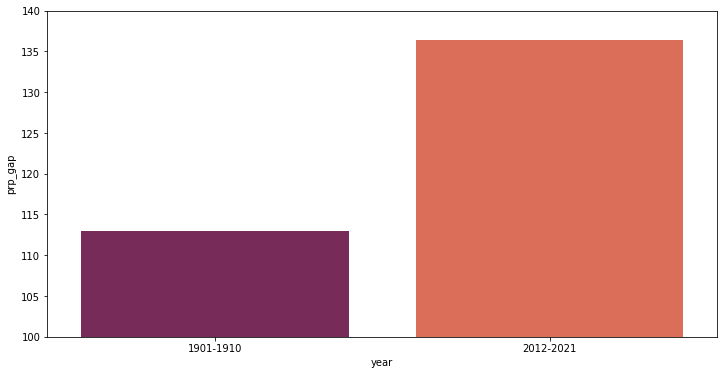

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prp_gap, x=prp_gap.index, y='prp_gap', palette='rocket')
plt.ylim(100,140)
plt.show()

### Average Temperature from 1901 - 2021

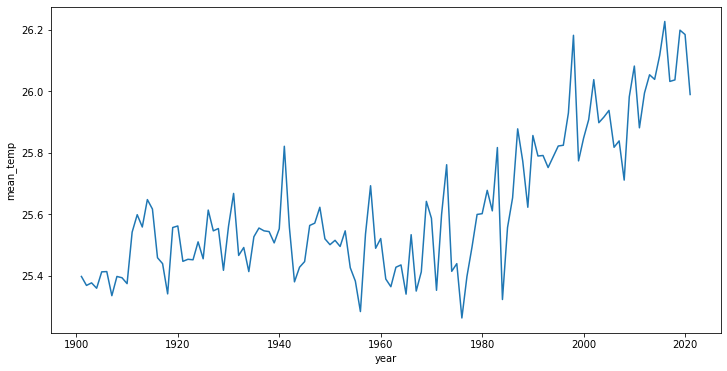

In [18]:
df_avg_annual = df_ina.groupby('year').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_annual, x=df_avg_annual.index, y='mean_temp')
plt.show()

In [19]:
df_avg_annual

,mean_temp,max_temp,min_temp,precipitation
year,,,,
1901,25.397500,30.085833,20.758333,225.596667
1902,25.368333,30.058333,20.729167,213.006667
1903,25.376667,30.064167,20.735833,232.236667
1904,25.359167,30.048333,20.720000,231.554167
1905,25.412500,30.101667,20.772500,224.349167
...,...,...,...,...
2017,26.031667,30.572500,21.543333,251.432500
2018,26.036667,30.666667,21.455833,235.329167
2019,26.198333,30.801667,21.645833,209.415000


### Add additional data, and see whether it has any correlation

In [20]:
addi = pd.read_excel('dataset/additional/additional.xlsx')
addi

,year,electricity,forest_area,co2_emission,internet,population
0,1960,NaN,NaN,NaN,NaN,87751066
1,1961,NaN,NaN,NaN,NaN,90098396
2,1962,NaN,NaN,NaN,NaN,92518373
3,1963,NaN,NaN,NaN,NaN,95015295
4,1964,NaN,NaN,NaN,NaN,97596728
...,...,...,...,...,...,...
57,2017,98.139999,50.039334,1.954726,32.335806,264650969
58,2018,98.510002,49.716818,2.155598,39.904639,267670549
59,2019,98.849998,49.394296,2.290397,47.690649,270625567
60,2020,96.949997,49.071780,NaN,53.726494,273523621


In [84]:
df_avg_annual = df_ina.groupby('year').mean()
df_avg_annual = df_avg_annual.merge(addi, left_on=df_avg_annual.index, right_on='year')
df_avg_annual = df_avg_annual[df_avg_annual['year']>=2000]
df_avg_annual

,mean_temp,max_temp,min_temp,precipitation,year,electricity,forest_area,co2_emission,internet,population
40,25.847500,30.453333,21.294167,244.590833,2000,86.300003,55.907307,1.326864,0.925564,211513822
41,25.907500,30.500000,21.365833,239.751667,2001,86.260002,55.817838,1.408682,2.018614,214427419
42,26.037500,30.702500,21.427500,216.384167,2002,87.599998,55.728368,1.406161,2.134136,217357790
43,25.897500,30.515833,21.329167,240.836667,2003,87.940002,55.638899,1.515550,2.387020,220309473
44,25.915833,30.546667,21.333333,219.898333,2004,89.010002,55.549430,1.528266,2.600286,223285666
45,25.937500,30.515000,21.407500,228.606667,2005,85.038322,55.459960,1.512001,3.602025,226289468
46,25.817500,30.428333,21.260833,220.967500,2006,90.620003,55.370491,1.589363,4.764813,229318262
47,25.838333,30.343333,21.381667,239.090833,2007,91.099998,55.281021,1.635121,5.786275,232374239
48,25.710833,30.233333,21.240833,251.063333,2008,92.730003,55.191552,1.597403,7.917479,235469755
49,25.981667,30.512500,21.497500,231.290833,2009,93.550003,55.102083,1.638920,6.920000,238620554


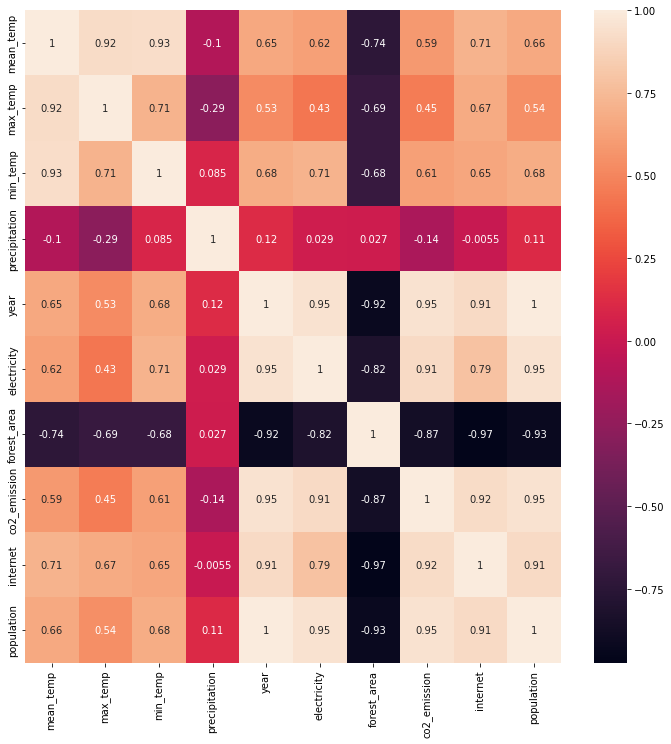

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(df_avg_annual.corr(), annot=True)
plt.show()

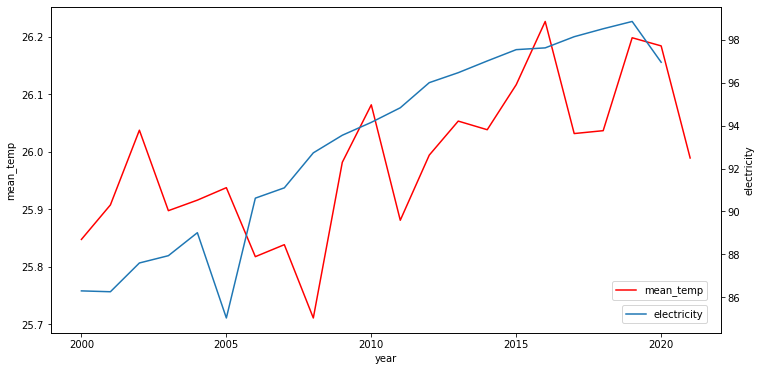

In [127]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=df_avg_annual, x='year', y='mean_temp', color='red', label='mean_temp')
plt.legend(bbox_to_anchor=(0.98, 0.1), loc='lower right', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=df_avg_annual, x='year', y='electricity', ax=ax2, label='electricity')
plt.legend(bbox_to_anchor=(0.98, 0.03), loc='lower right', borderaxespad=0)
plt.show()

### Compare to the other countries with similar geographic location

In [58]:
similar_countries = pd.read_csv('dataset/similar/mean_temp_country.csv', encoding='unicode_escape')
similar_monthly = similar_countries.groupby(['country', 'month']).mean().drop('year', axis=1)
similar_monthly['ctr'] = similar_monthly.index.get_level_values(0)
similar_monthly['mth'] = similar_monthly.index.get_level_values(1)
similar_monthly

mean_temp     ctr     mth
country month                            
brazil  01_Jan  25.561405  brazil  01_Jan
        02_Feb  25.548678  brazil  02_Feb
        03_Mar  25.411322  brazil  03_Mar
        04_Apr  25.002810  brazil  04_Apr
        05_May  24.149669  brazil  05_May
...                   ...     ...     ...
uganda  08_Aug  21.753388  uganda  08_Aug
        09_Sep  22.058347  uganda  09_Sep
        10_Oct  22.497769  uganda  10_Oct
        11_Nov  22.443058  uganda  11_Nov
        12_Dec  22.347107  uganda  12_Dec

[156 rows x 3 columns]

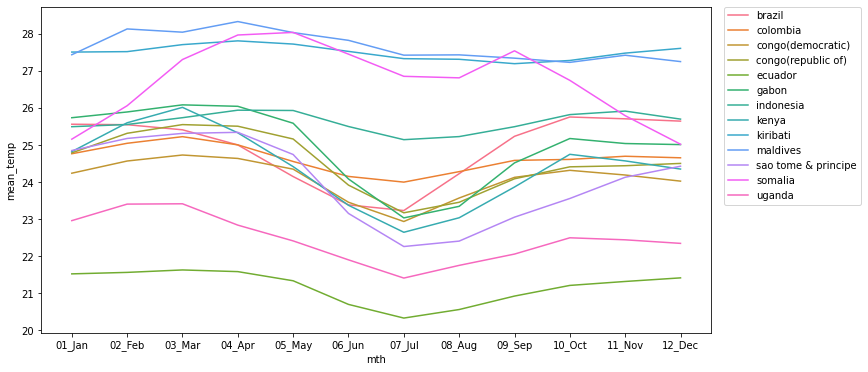

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=similar_monthly, x='mth', y='mean_temp', hue='ctr')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()